In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('weather.csv')

In [3]:
df.shape

(25551, 5)

In [4]:
df.head()

,DATE,PRCP(liquid or ice rain from sky),TMAX,TMIN,RAIN
0,1/1/1948,0.47,51,42,True
1,1/2/1948,0.59,45,36,True
2,1/3/1948,0.42,45,35,True
3,1/4/1948,0.31,45,34,True
4,1/5/1948,0.17,45,32,True


In [5]:
df.drop(['DATE'],axis=1,inplace=True)

In [6]:
df.isnull().sum().sort_values(ascending=False)

RAIN                                 3
PRCP(liquid or ice rain from sky)    3
TMIN                                 0
TMAX                                 0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,PRCP(liquid or ice rain from sky),TMAX,TMIN
count,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387
std,0.239031,12.773265,8.893019
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


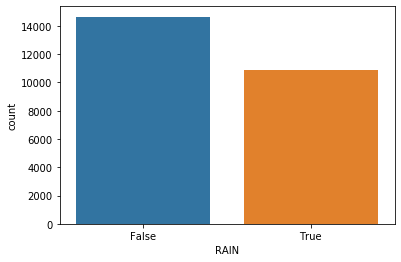

In [9]:
sns.countplot(df['RAIN'])

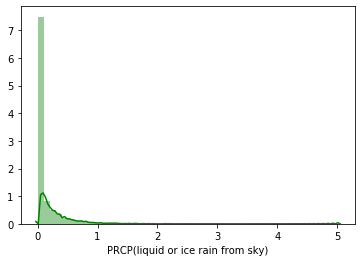

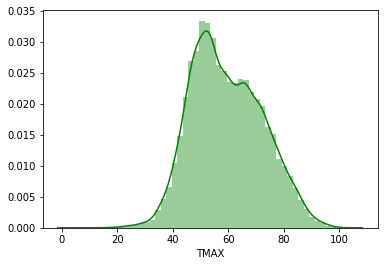

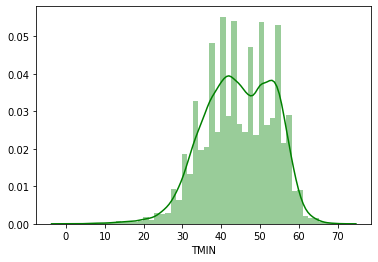

In [10]:
for i in df.iloc[:,:-1]:
    plt.figure()
    sns.distplot(df[i],bins=50,color='green')

D:\anaconda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


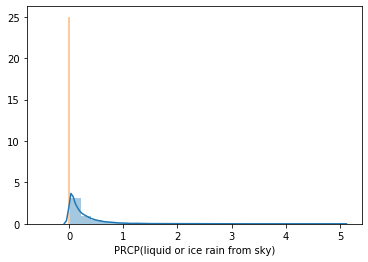

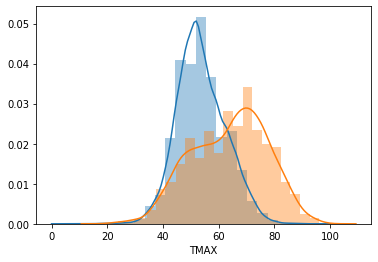

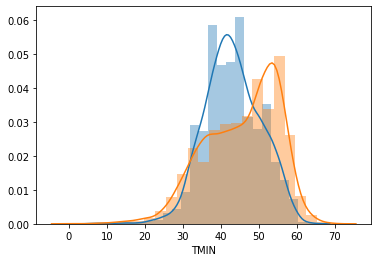

In [11]:
t=df[df['RAIN']==True]
f=df[df['RAIN']==False]
for i in df.iloc[:,:-1]:
    plt.figure()
    sns.distplot(t[i],bins=25)
    sns.distplot(f[i],bins=25)

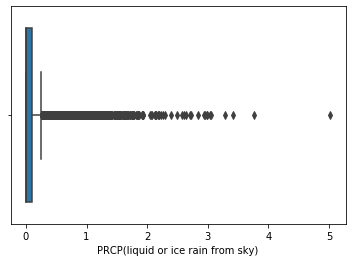

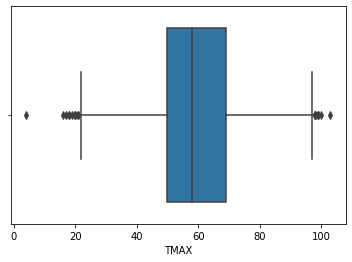

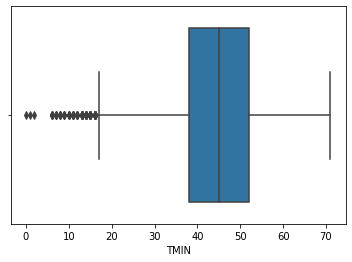

In [12]:
for i in df.iloc[:,:-1]:
    plt.figure()
    sns.boxplot(df[i])

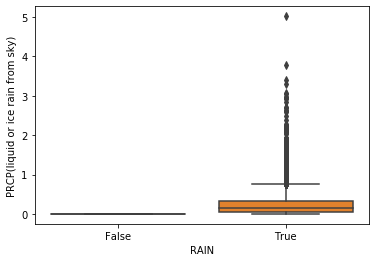

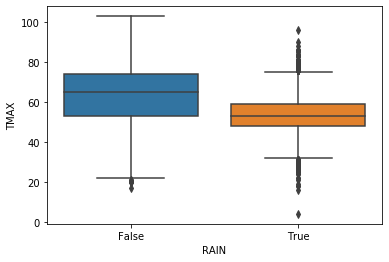

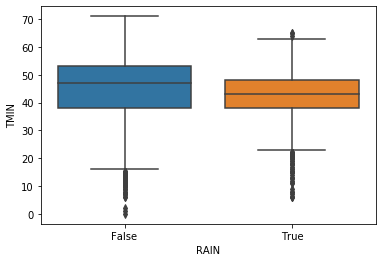

In [13]:
for i in df.iloc[:,:-1]:
    plt.figure()
    sns.boxplot(x=df['RAIN'],y=df[i])

# multi analysis

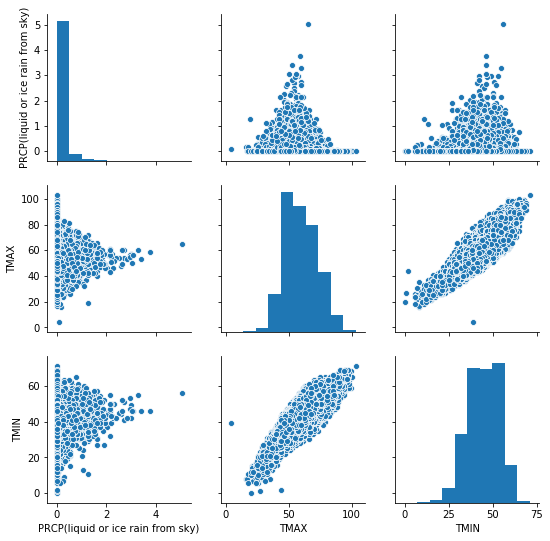

In [14]:
sns.pairplot(df.iloc[:,:-1])

D:\anaconda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


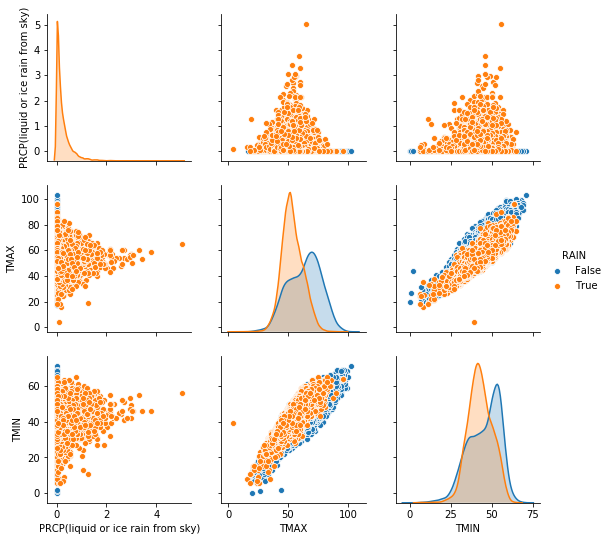

In [15]:
sns.pairplot(df,hue="RAIN")

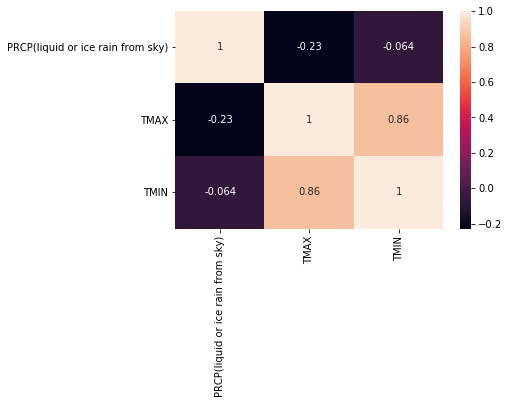

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.corr()

,PRCP(liquid or ice rain from sky),TMAX,TMIN
PRCP(liquid or ice rain from sky),1.000000,-0.226736,-0.064365
TMAX,-0.226736,1.000000,0.860675
TMIN,-0.064365,0.860675,1.000000


correlation between PRCP andTMAX -0.2267358489871096
correlation between PRCP andTMIN -0.06436548670992419


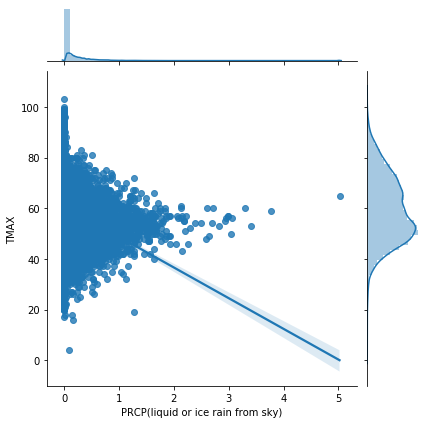

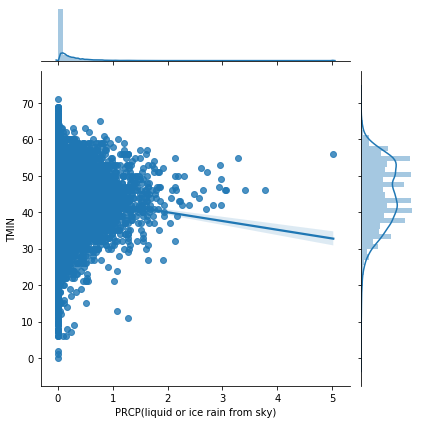

In [18]:
for i in df.columns[:-1]:
    if i!='PRCP(liquid or ice rain from sky)':
        print(f'correlation between PRCP and{i}',df.corr().loc['PRCP(liquid or ice rain from sky)'][i])
        sns.jointplot(df['PRCP(liquid or ice rain from sky)'],df[i],kind='regression')
    

correlation between Tmax and Tmin 0.8606750671406889


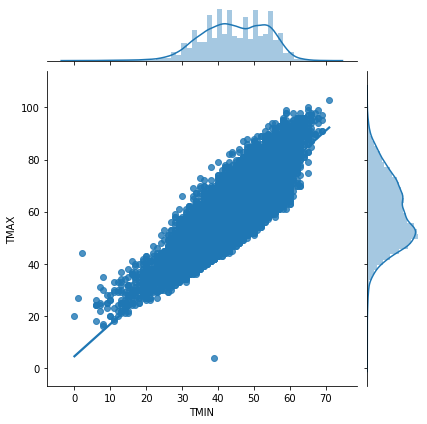

In [19]:
print('correlation between Tmax and Tmin',df.corr().loc['TMAX']['TMIN'])
sns.jointplot(df['TMIN'],df['TMAX'],kind='regression')

In [20]:
from vif import cal_vif
cal_vif(df.iloc[:,:-1])

,variables,VIF
0,PRCP(liquid or ice rain from sky),1.301170
1,TMAX,95.266703
2,TMIN,98.011609


In [21]:
df['Temp']=df['TMAX']+df['TMIN']

In [24]:
df.drop(['TMAX','TMIN'],axis=1,inplace=True)

,PRCP(liquid or ice rain from sky),RAIN,Temp
0,0.47,True,93
1,0.59,True,81
2,0.42,True,80
3,0.31,True,79
4,0.17,True,77


In [27]:
df.RAIN.value_counts()

False    14648
True     10900
Name: RAIN, dtype: int64

In [35]:
import statsmodels.api as sm
n=df.shape[0]
t = df.RAIN.value_counts().loc[True]
print('95% confident intervel of rain is happen',sm.stats.proportion_confint(t, n))

95% confident intervel of rain is happen (0.4205830972050548, 0.4327126598013644)


In [36]:
f=df.RAIN.value_counts().loc[False]
print('95% confident intervel of rain in not happen',sm.stats.proportion_confint(f,n))

95% confident intervel of rain in not happen (0.5672873401986356, 0.5794169027949452)


In [39]:
t=df[df['RAIN']==True]
print('%95 confident of mean temperature of rain happen',sm.stats.DescrStatsW(t['Temp']).zconfint_mean())

%95 confident of mean temperature of rain happen (96.55712208328526, 97.14416232038445)


Text(0, 0.5, 'count')

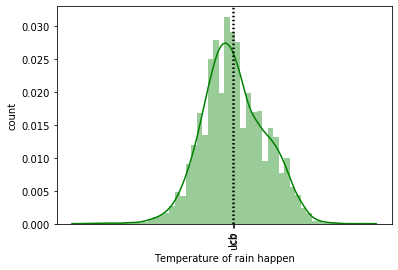

In [40]:
sns.distplot(t['Temp'],color='green')
plt.axvline(x=96.55712208328526,color='black',ls=':')
plt.axvline(x=97.14416232038445,color='black',ls=':')
plt.xticks([96.55712208328526, 97.14416232038445],['lcb','ucb'],rotation=90)
plt.xlabel('Temperature of rain happen')
plt.ylabel('count')

In [43]:
f=df[df['RAIN']==False]
print('%95 confident of mean temperature of rain not happen',sm.stats.DescrStatsW(f['Temp']).zconfint_mean())

%95 confident of mean temperature of rain not happen (109.05124693309655, 109.78572739787013)


([<matplotlib.axis.XTick at 0x232d35c1c08>,
 <a list of 2 Text xticklabel objects>)

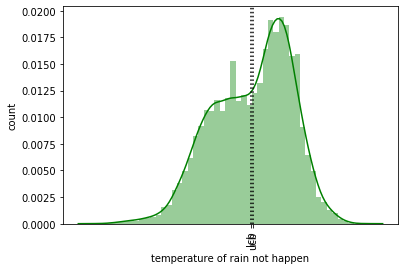

In [44]:
sns.distplot(f['Temp'],color='green')
plt.axvline(x=109.05124693309655,color='black',ls=':')
plt.axvline(x=109.78572739787013,color='black',ls=':')
plt.xlabel('temperature of rain not happen')
plt.ylabel('count')
plt.xticks([109.05124693309655, 109.78572739787013],['lcb','ucb'],rotation=90)

In [49]:
import statsmodels.api as sm
z,p_value=sm.stats.ztest(t['Temp'],f['Temp'])
#from scipy import stats
#z,p_value=stats.ttest_ind(t['Temp'],f['Temp'])

In [50]:
if p_value<0.05 :
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

reject null hypothesis


In [51]:
z,p_value=sm.stats.ztest(t['PRCP(liquid or ice rain from sky)'],f['PRCP(liquid or ice rain from sky)'])
if p_value<0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

reject null hypothesis
